# Exploratory Data Analysis for the RICKD data bundle

## Objectives of the Analysis:
The primary goal of this analysis is to explore the 3D pose data of subjects who participated in at least one running session. Using the provided metadata and pose information, we aim to address the following questions:

- Can we identify pose-related characteristics that indicate a runner is injured?
- Can we determine specific types of injuries based on pose data?
- Is it possible to categorize runners based on their pose? What characteristics are relevant for grouping, and can we interpret the meaning of these groups?
- Can insights from this dataset be generalized and applied to a new dataset?

# Summary of the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from core.constants import RICKD_ROOT_DATA_FOLDER

In [2]:
data_path = os.path.join(RICKD_ROOT_DATA_FOLDER, "run_data_meta.csv")
run_meta_df = pd.read_csv(data_path)
run_meta_df.head()

,sub_id,datestring,filename,speed_r,age,Height,Weight,Gender,DominantLeg,InjDefn,...,SpecInjury2,Activities,Level,YrsRunning,RaceDistance,RaceTimeHrs,RaceTimeMins,RaceTimeSecs,YrPR,NumRaces
0,100433,2010-10-05 13:22:40,20101005T132240.json,1.610861,53,NaN,NaN,Unknown,NaN,Training volume/intensity affected,...,NaN,"walking, horseback riding, strength training",Recreational,13.0,10k,NaN,NaN,NaN,NaN,NaN
1,100434,2010-11-17 13:22:40,20101117T132240.json,2.237294,51,NaN,NaN,Female,NaN,Training volume/intensity affected,...,NaN,"running, swimming",Recreational,20.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
2,100537,2012-07-03 10:25:50,20120703T102550.json,2.127441,255,173.1,67.6,Female,Right,2 workouts missed in a row,...,NaN,"hiking, power walking, pilates",Recreational,2.0,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
3,100560,2012-07-17 10:37:48,20120717T103748.json,2.657365,33,179.3,83.0,Female,Right,No injury,...,NaN,Yoga,Recreational,NaN,Casual Runner (no times),NaN,NaN,NaN,NaN,NaN
4,101481,2012-07-17 10:50:21,20120717T105021.json,2.625088,32,176.3,58.6,Female,NaN,No injury,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
num_rows = run_meta_df.shape[0]
nun_cols = run_meta_df.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {nun_cols}")
print("\nColumn Information:")
run_meta_df.info()

Number of rows: 1832
Number of columns: 26

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sub_id        1832 non-null   int64  
 1   datestring    1832 non-null   object 
 2   filename      1832 non-null   object 
 3   speed_r       1832 non-null   float64
 4   age           1832 non-null   int64  
 5   Height        1829 non-null   float64
 6   Weight        1830 non-null   float64
 7   Gender        1832 non-null   object 
 8   DominantLeg   1480 non-null   object 
 9   InjDefn       1752 non-null   object 
 10  InjJoint      1598 non-null   object 
 11  InjSide       1346 non-null   object 
 12  SpecInjury    1243 non-null   object 
 13  InjDuration   405 non-null    float64
 14  InjJoint2     836 non-null    object 
 15  InjSide2      822 non-null    object 
 16  SpecInjury2   320 non-null    object 
 17  Activit

In [4]:
missing_values = run_meta_df.isnull().sum()
missing_values[missing_values > 0]

Height             3
Weight             2
DominantLeg      352
InjDefn           80
InjJoint         234
InjSide          486
SpecInjury       589
InjDuration     1427
InjJoint2        996
InjSide2        1010
SpecInjury2     1512
Activities       316
Level            269
YrsRunning       517
RaceDistance     338
RaceTimeHrs      853
RaceTimeMins     807
RaceTimeSecs     908
YrPR            1407
NumRaces        1328
dtype: int64

In [5]:
(missing_values / num_rows) * 100

sub_id           0.000000
datestring       0.000000
filename         0.000000
speed_r          0.000000
age              0.000000
Height           0.163755
Weight           0.109170
Gender           0.000000
DominantLeg     19.213974
InjDefn          4.366812
InjJoint        12.772926
InjSide         26.528384
SpecInjury      32.150655
InjDuration     77.893013
InjJoint2       54.366812
InjSide2        55.131004
SpecInjury2     82.532751
Activities      17.248908
Level           14.683406
YrsRunning      28.220524
RaceDistance    18.449782
RaceTimeHrs     46.561135
RaceTimeMins    44.050218
RaceTimeSecs    49.563319
YrPR            76.801310
NumRaces        72.489083
dtype: float64

/Users/adrianzapaterreig/Documents/Personal/TFM/rickd-analysis/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


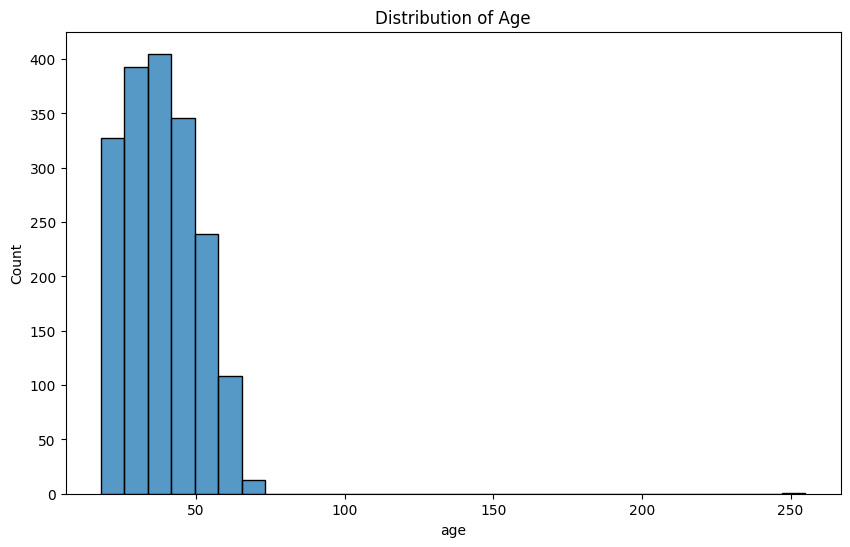

In [6]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=run_meta_df, x='age', bins=30)
plt.title('Distribution of Age')
plt.show()

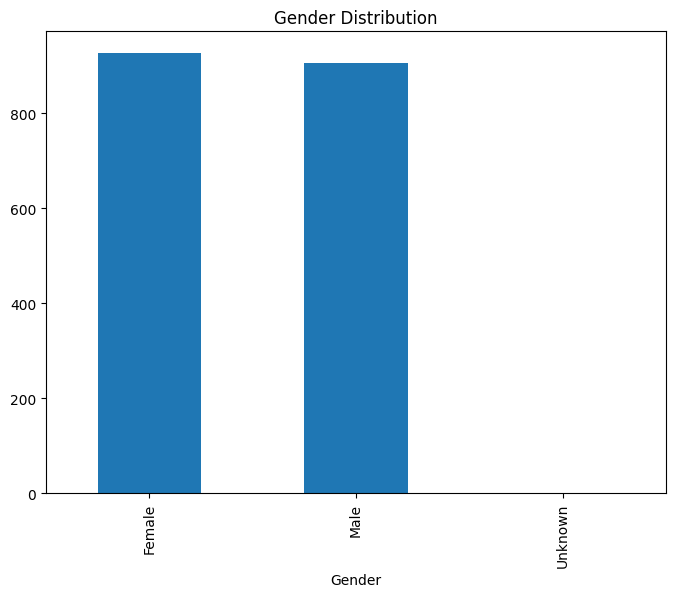

In [7]:
# Gender distribution
plt.figure(figsize=(8, 6))
run_meta_df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.show()

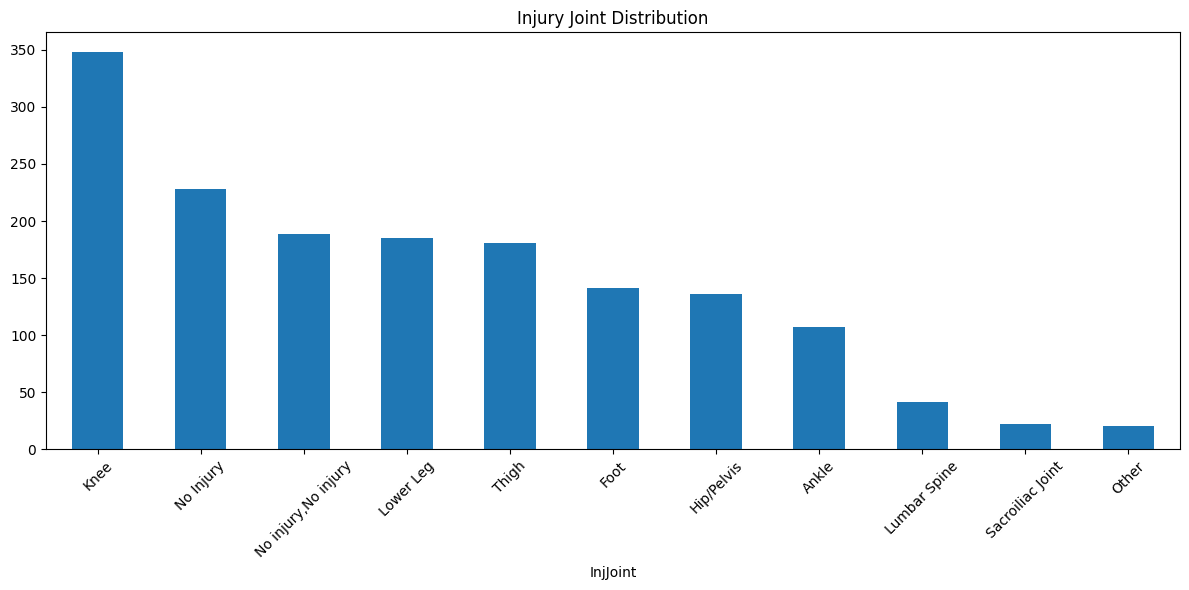

In [8]:
# Injury joint distribution
plt.figure(figsize=(12, 6))
run_meta_df['InjJoint'].value_counts().plot(kind='bar')
plt.title('Injury Joint Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

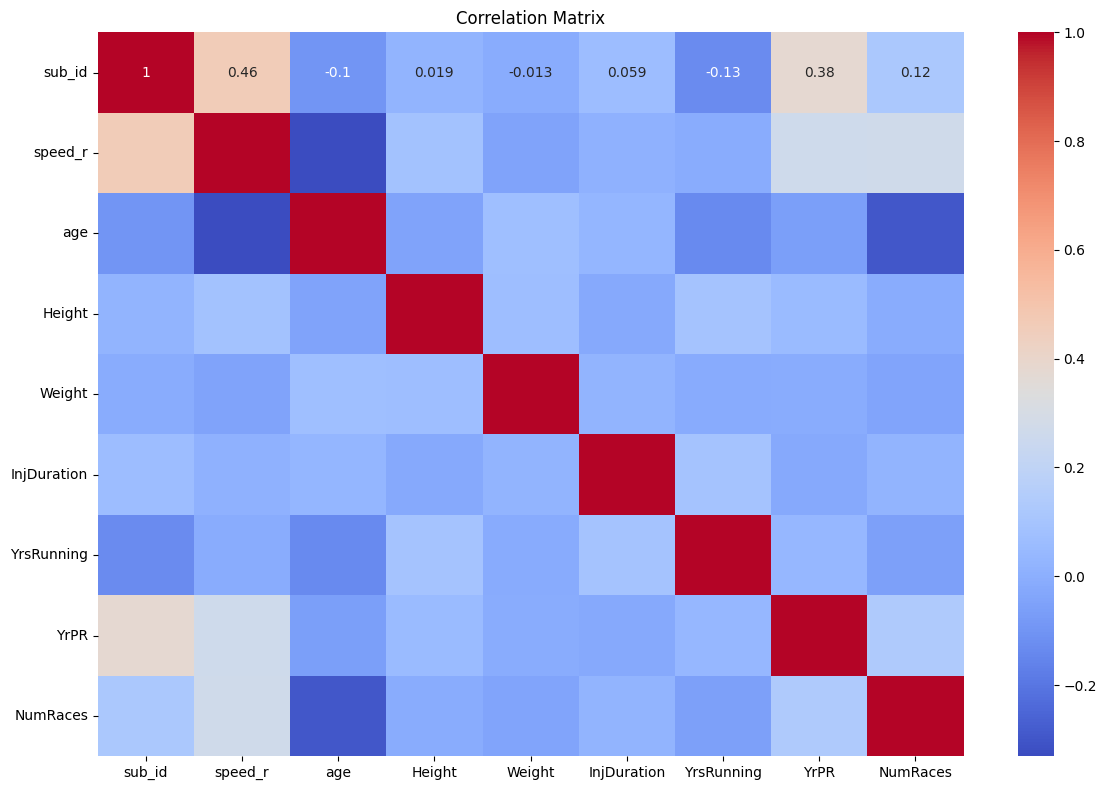

In [9]:
# Correlation matrix
numerical_cols = run_meta_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(run_meta_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()